# Credit Default Risk 
## Data Wrangling

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)

In [4]:
data_path = '../../Data/'

### 1. application_{train|test}.csv

In [5]:
application_train = pd.read_csv(data_path + 'Raw/application_train.csv')
application_test = pd.read_csv(data_path + 'Raw/application_test.csv')

In [5]:
application_train.shape

(307511, 122)

In [6]:
application_test.shape

(48744, 121)

In [7]:
application_train.info(max_cols = 123)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nu

In [9]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [10]:
def missing_val(data):
    missing = pd.concat([data.isnull().sum(),100*data.isnull().mean()], axis = 1)
    missing.columns = ['Total', 'Percentage']
    missing.sort_values(by = "Total", ascending = False, inplace = True)
    return missing

In [11]:
missing = missing_val(application_train)
missing

,Total,Percentage
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953
LIVINGAPARTMENTS_MEDI,210199,68.354953


In [12]:
application_train['PROVIDED_PHONE'] = application_train['FLAG_MOBIL'] | application_train['FLAG_WORK_PHONE']  | application_train['FLAG_PHONE'] 
application_test['PROVIDED_PHONE'] = application_test['FLAG_MOBIL'] | application_test['FLAG_WORK_PHONE']  | application_test['FLAG_PHONE'] 
application_train.drop(columns = ['FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE','AMT_REQ_CREDIT_BUREAU_DAY'], inplace = True)
application_test.drop(columns = ['FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE','AMT_REQ_CREDIT_BUREAU_DAY'], inplace = True)

Drop Columns which related to apartment and have > 45 \% Missing Values

In [13]:
application_train.drop(columns = ['LANDAREA_AVG', 'LANDAREA_MEDI', 'LANDAREA_MODE', 'COMMONAREA_MEDI', 'COMMONAREA_MODE', 'COMMONAREA_AVG', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_MEDI', 'BASEMENTAREA_AVG', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_MODE',  'NONLIVINGAREA_MODE', 'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MEDI', 'ELEVATORS_MEDI', 'ELEVATORS_AVG', 'ELEVATORS_MODE', 'WALLSMATERIAL_MODE', 'APARTMENTS_MEDI', 'APARTMENTS_AVG', 'ENTRANCES_MEDI', 'ENTRANCES_AVG', 'ENTRANCES_MODE', 'LIVINGAREA_AVG', 'LIVINGAREA_MODE', 'LIVINGAREA_MEDI', 'HOUSETYPE_MODE', 'FLOORSMAX_MODE', 'FLOORSMAX_MEDI', 'FLOORSMAX_AVG', 'FONDKAPREMONT_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MEDI', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE', 'YEARS_BUILD_AVG', 'OWN_CAR_AGE', 'ENTRANCES_MEDI', 'ENTRANCES_MODE', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'TOTALAREA_MODE', 'EMERGENCYSTATE_MODE', 'FLOORSMIN_MODE', 'FLOORSMIN_MEDI', 'FLOORSMIN_AVG','APARTMENTS_MODE'], inplace = True)
application_test.drop(columns = ['LANDAREA_AVG', 'LANDAREA_MEDI', 'LANDAREA_MODE', 'COMMONAREA_MEDI', 'COMMONAREA_MODE', 'COMMONAREA_AVG', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_MEDI', 'BASEMENTAREA_AVG', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_MODE',  'NONLIVINGAREA_MODE', 'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MEDI', 'ELEVATORS_MEDI', 'ELEVATORS_AVG', 'ELEVATORS_MODE', 'WALLSMATERIAL_MODE', 'APARTMENTS_MEDI', 'APARTMENTS_AVG', 'ENTRANCES_MEDI', 'ENTRANCES_AVG', 'ENTRANCES_MODE', 'LIVINGAREA_AVG', 'LIVINGAREA_MODE', 'LIVINGAREA_MEDI', 'HOUSETYPE_MODE', 'FLOORSMAX_MODE', 'FLOORSMAX_MEDI', 'FLOORSMAX_AVG', 'FONDKAPREMONT_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MEDI', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE', 'YEARS_BUILD_AVG', 'OWN_CAR_AGE', 'ENTRANCES_MEDI', 'ENTRANCES_MODE', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'TOTALAREA_MODE', 'EMERGENCYSTATE_MODE', 'FLOORSMIN_MODE', 'FLOORSMIN_MEDI', 'FLOORSMIN_AVG','APARTMENTS_MODE'], inplace = True)

In [14]:
missing1 = missing_val(application_train)
missing1

,Total,Percentage
EXT_SOURCE_1,173378,56.381073
OCCUPATION_TYPE,96391,31.345545
EXT_SOURCE_3,60965,19.825307
AMT_REQ_CREDIT_BUREAU_YEAR,41519,13.501631
AMT_REQ_CREDIT_BUREAU_QRT,41519,13.501631
AMT_REQ_CREDIT_BUREAU_MON,41519,13.501631
AMT_REQ_CREDIT_BUREAU_WEEK,41519,13.501631
AMT_REQ_CREDIT_BUREAU_HOUR,41519,13.501631
NAME_TYPE_SUITE,1292,0.420148
DEF_30_CNT_SOCIAL_CIRCLE,1021,0.332021


### Categorical Data Exploration

In [15]:
def get_default_rate(data, column):
    
    default_rate_dict = {}
    temp = data.copy()
    temp[column] = temp[column].fillna('Missing')
    for category in temp[column].unique():
        default_count = len(temp[(temp[column] == category) & (temp['TARGET'] == 1)])
        total_count = len(temp[(temp[column] == category)])
        default_rate_dict[(column, category)] = [default_count, total_count, default_count * 100 / total_count]
    df = pd.DataFrame.from_dict(default_rate_dict, orient = 'index', columns = ['Default_Count', 'Total_count', 'Percent_Defaulted'])
    df.index = pd.MultiIndex.from_tuples(df.index, names=['Feature', 'category'])

    return df
            
        

In [16]:
default = []
for col in application_train.select_dtypes('object'):
    default.append(get_default_rate(application_train, col))
default_df = pd.concat(default, axis =0)
default_df.sort_values(by = ['Feature',  'Percent_Defaulted'], ascending = False)

Default_Count  \
Feature                    category                                       
WEEKDAY_APPR_PROCESS_START TUESDAY                                 4501   
                           WEDNESDAY                               4238   
                           FRIDAY                                  4101   
                           THURSDAY                                4098   
                           SUNDAY                                  1283   
                           SATURDAY                                2670   
                           MONDAY                                  3934   
ORGANIZATION_TYPE          Transport: type 3                        187   
                           Industry: type 13                          9   
                           Industry: type 8                           3   
                           Restaurant                               212   
                           Construction                             785   
                           Cleaning                                  29   
                           Industry: type 1                         115   
                           Industry: type 3                         348   
                           Realtor                                   42   
                           Agriculture                              257   
                           Trade: type 3                            361   
                           Self-employed                           3908   
                           Industry: type 4                          89   
                           Security                                 324   
                           Trade: type 7                            740   
                           Business Entity Type 3                  6323   
                           Transport: type 4                        501   
                           Mobile                                    29   
                           Trade: type 1                             31   
                           Industry: type 11                        234   
                           Business Entity Type 2                   900   
                           Postal                                   182   
                           Advertising                               35   
                           Business Entity Type 1                   487   
                           Industry: type 7                         105   
                           Housing                                  235   
                           Legal Services                            24   
                           Transport: type 2                        172   
                           Other                                   1275   
                           Telecom                                   44   
                           Industry: type 2                          33   
                           Emergency                                 40   
                           Industry: type 6                           8   
                           Kindergarten                             484   
                           Trade: type 2                            133   
                           Government                               726   
                           Industry: type 5                          41   
                           Industry: type 9                         225   
                           Electricity                               63   
                           Services                                 104   
                           Medicine                                 737   
                           Industry: type 10                          7   
                           Hotel                                     62   
                           Trade: type 5                              3   
                           School                                   526   
        

In [17]:
application_train.drop(columns = ['WEEKDAY_APPR_PROCESS_START'], inplace = True)
application_test.drop(columns = ['WEEKDAY_APPR_PROCESS_START'], inplace = True)


In [18]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in application_train.columns:
    if application_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(application_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(application_train[col])
            # Transform both training and testing data
            application_train[col] = le.transform(application_train[col])
            application_test[col] = le.transform(application_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [19]:
application_train = pd.get_dummies(application_train)
application_test = pd.get_dummies(application_test)

In [20]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_CONT_MOBILE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,PROVIDED_PHONE,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_

In [21]:
application_train.shape

(307511, 173)

In [22]:
application_test.shape

(48744, 169)

### Numerical Features

In [23]:
col = [col for col in application_train.columns if 'FLAG' in col]

In [24]:
default = []
for c in col:
    default.append(get_default_rate(application_train, c))
default_df = pd.concat(default, axis =0)
default_df.sort_values(by = ['Feature',  'Percent_Defaulted'], ascending = False)

Default_Count  Total_count  Percent_Defaulted
Feature          category                                               
FLAG_OWN_REALTY  0                  7842        94199           8.324929
                 1                 16983       213312           7.961577
FLAG_OWN_CAR     0                 17249       202924           8.500227
                 1                  7576       104587           7.243730
FLAG_EMP_PHONE   1                 21834       252125           8.659990
                 0                  2991        55386           5.400282
FLAG_EMAIL       0                 23451       290069           8.084628
                 1                  1374        17442           7.877537
FLAG_DOCUMENT_9  0                 24751       306313           8.080297
                 1                    74         1198           6.176962
FLAG_DOCUMENT_8  0                 22989       282487           8.138074
                 1                  1836        25024           7.336957
FLAG_DOCUMENT_7  0                 24822       307452           8.073455
                 1                     3           59           5.084746
FLAG_DOCUMENT_6  0                 23318       280433           8.314999
                 1                  1507        27078           5.565404
FLAG_DOCUMENT_5  0                 24453       302863           8.073948
                 1                   372         4648           8.003442
FLAG_DOCUMENT_4  0                 24825       307486           8.073538
                 1                     0           25           0.000000
FLAG_DOCUMENT_3  1                 19312       218340           8.844921
                 0                  5513        89171           6.182503
FLAG_DOCUMENT_21 1                    14          103          13.592233
                 0                 24811       307408           8.071033
FLAG_DOCUMENT_20 1                    13          156           8.333333
                 0                 24812       307355           8.072750
FLAG_DOCUMENT_2  1                     4           13          30.769231
                 0                 24821       307498           8.071922
FLAG_DOCUMENT_19 0                 24813       307328           8.073784
                 1                    12          183           6.557377
FLAG_DOCUMENT_18 0                 24683       305011           8.092495
                 1                   142         2500           5.680000
FLAG_DOCUMENT_17 0                 24823       307429           8.074385
                 1                     2           82           2.439024
FLAG_DOCUMENT_16 0                 24675       304458           8.104566
                 1                   150         3053           4.913200
FLAG_DOCUMENT_15 0                 24814       307139           8.079078
                 1                    11          372           2.956989
FLAG_DOCUMENT_14 0                 24795       306608           8.086873
                 1                    30          903           3.322259
FLAG_DOCUMENT_13 0                 24795       306427           8.091650
                 1                    30         1084           2.767528
FLAG_DOCUMENT_12 0                 24825       307509           8.072934
                 1                     0            2           0.000000
FLAG_DOCUMENT_11 0                 24750       306308           8.080102
                 1                    75         1203           6.234414
FLAG_DOCUMENT_10 0                 24825       307504           8.073066
                 1                     0            7           0.000000
FLAG_CONT_MOBILE 1                 24780       306937           8.073318
                 0                    45          574           7.839721

In [25]:
application_train.drop(columns = ['FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_21', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_19'] , inplace = True )
application_test.drop(columns = ['FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_21', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_19'] , inplace = True )

In [26]:
col = [c for c in application_train.columns if (application_train[c].dtype == 'int64') & ('FLAG' not in c)]
col

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'PROVIDED_PHONE']

In [27]:
col = ['CNT_CHILDREN', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',  'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']
default = []
for c in col:
    default.append(get_default_rate(application_train, c))
default_df = pd.concat(default, axis =0)
default_df.sort_values(by = ['Feature',  'Percent_Defaulted'], ascending = False)

Default_Count  Total_count  \
Feature                     category                               
REG_REGION_NOT_WORK_REGION  1                  1388        15612   
                            0                 23437       291899   
REG_REGION_NOT_LIVE_REGION  1                   433         4657   
                            0                 24392       302854   
REG_CITY_NOT_WORK_CITY      1                  7520        70867   
                            0                 17305       236644   
REG_CITY_NOT_LIVE_CITY      1                  2939        24039   
                            0                 21886       283472   
REGION_RATING_CLIENT_W_CITY 3                  5001        43860   
                            2                 18170       229484   
                            1                  1654        34167   
REGION_RATING_CLIENT        3                  5366        48330   
                            2                 17907       226984   
                            1                  1552        32197   
LIVE_REGION_NOT_WORK_REGION 1                  1056        12503   
                            0                 23769       295008   
LIVE_CITY_NOT_WORK_CITY     1                  5503        55215   
                            0                 19322       252296   
CNT_CHILDREN                9                     2            2   
                            11                    1            1   
                            6                     6           21   
                            4                    55          429   
                            3                   358         3717   
                            1                  5454        61119   
                            2                  2333        26749   
                            5                     7           84   
                            0                 16609       215371   
                            7                     0            7   
                            8                     0            2   
                            12                    0            2   
                            10                    0            2   
                            19                    0            2   
                            14                    0            3   

                                      Percent_Defaulted  
Feature                     category                     
REG_REGION_NOT_WORK_REGION  1                  8.890597  
                            0                  8.029147  
REG_REGION_NOT_LIVE_REGION  1                  9.297831  
                            0                  8.054046  
REG_CITY_NOT_WORK_CITY      1                 10.611427  
                            0                  7.312672  
REG_CITY_NOT_LIVE_CITY      1                 12.225966  
                            0                  7.720692  
REGION_RATING_CLIENT_W_CITY 3                 11.402189  
                            2                  7.917763  
                            1                  4.840928  
REGION_RATING_CLIENT        3                 11.102835  
                            2                  7.889102  
                            1                  4.820325  
LIVE_REGION_NOT_WORK_REGION 1                  8.445973  
                            0                  8.057070  
LIVE_CITY_NOT_WORK_CITY     1                  9.966495  
                            0                  7.658465  
CNT_CHILDREN                9                100.000000  
                            11               100.000000  
                            6                 28.571429  
                            4                 12.820513  
                            3                  9.631423  
                            1                  8.923575  
                            2                  8.721821  
                            5                  8.333333  
                            0    

In [28]:
application_train.loc[application_train['CNT_CHILDREN'] >= 5, 'CNT_CHILDREN'] = 5


In [29]:
application_train['AGE'] = application_train['DAYS_BIRTH']/-365.0
application_test['AGE'] = application_test['DAYS_BIRTH']/-365.0
application_train.drop(columns = 'DAYS_BIRTH', inplace = True)
application_test.drop(columns = 'DAYS_BIRTH', inplace = True)

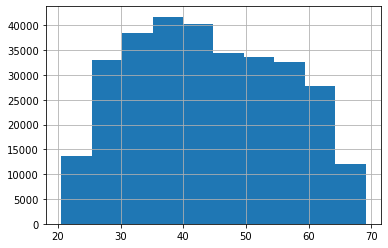

In [30]:
application_train['AGE'].hist()

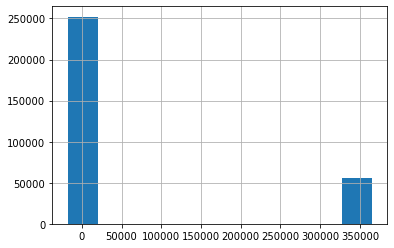

In [31]:
application_train['DAYS_EMPLOYED'].hist()

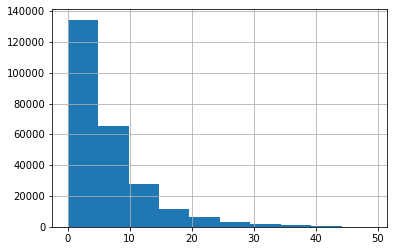

In [32]:
max_days = application_train['DAYS_EMPLOYED'].max()
application_train.loc[application_train.DAYS_EMPLOYED == max_days,'DAYS_EMPLOYED' ] = np.nan
application_test.loc[application_test.DAYS_EMPLOYED == max_days,'DAYS_EMPLOYED' ] = np.nan
application_train['Years_experience'] = -1*application_train['DAYS_EMPLOYED']/365
application_test['Years_experience'] = -1*application_test['DAYS_EMPLOYED']/365
application_train.drop(columns = ['DAYS_EMPLOYED'], inplace = True)
application_test.drop(columns = ['DAYS_EMPLOYED'], inplace = True)
application_train['Years_experience'].hist()

### DROPPING COLUMNS

In [33]:
def drop_cols(data, l):
    for dictionary in l:
        for k,v in dictionary.items():
            data[k] = 0
            for val in v:
                if val in data.columns:
                    data[k] += data[val] 
            
            if val in data.columns:
                data.drop(columns = v, inplace = True)
    return data

In [34]:
organization = {
'transport' : [i for i in application_train.columns if 'ORGANIZATION_TYPE_Transport' in i],
'trade' : [i for i in application_train.columns if 'ORGANIZATION_TYPE_Trade' in i],
'industry' : [i for i in application_train.columns if 'ORGANIZATION_TYPE_Industry' in i],
'Businesss' : [i for i in application_train.columns if 'ORGANIZATION_TYPE_Business' in i],
'white_collar' : ['ORGANIZATION_TYPE_Security' , 'ORGANIZATION_TYPE_Military', 'ORGANIZATION_TYPE_Security Ministries','ORGANIZATION_TYPE_Government', 'ORGANIZATION_TYPE_Emergency'],
'services' : ['ORGANIZATION_TYPE_Electricity', 'ORGANIZATION_TYPE_Hotel', 'ORGANIZATION_TYPE_Housing', 'ORGANIZATION_TYPE_Cleaning', 'ORGANIZATION_TYPE_Postal','ORGANIZATION_TYPE_School' ,'ORGANIZATION_TYPE_Kindergarten']
}

occupation_replace = {
'occ_low_level' : [i for i in application_train.columns if any( t in i for t in ['Low-skill Laborers', 'Drivers', 'Waiters/barmen staff', 'Security staff', 'Laborers', 'Cooking staff', 'Sales staff', 'Cleaning staff'])],
'occ_medium_level' : [i for i in application_train.columns if any( t in i for t in ['Realty agents', 'Secretaries', 'Medicine staff', 'Private service staff', 'IT staff', 'HR staff'])],
'occ_high_leve' :[i for i in application_train.columns if any( t in i for t in ['Core staff', 'Managers', 'High skill tech staff', 'Accountants'])],   
'occ_missing' : [i for i in application_train.columns if 'Missing' in i]
}

accompany_replace = {
'accompanied' : [i for i in application_train.columns if 'NAME_TYPE_SUITE' in i and i  != 'NAME_TYPE_SUITE_Unaccompanied']
}

income_replace = {
'Working ' : [i for i in application_train.columns if any( t in i for t in ['Working', 'Maternity leave	'])],
'Government' : [i for i in application_train.columns if any( t in i for t in ['Commercial associate', 'State servant', 'Pensioner'])]
}

marital_status = {
    'Married' : [i for i in application_train.columns if any( t in i for t in ['Single / not married', 'Separated'])]    
}


In [35]:
application_train = drop_cols(application_train, [organization,occupation_replace,accompany_replace,income_replace,marital_status])
application_test = drop_cols(application_test, [organization,occupation_replace,accompany_replace,income_replace,marital_status] )                    

In [36]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_CONT_MOBILE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,FLAG_DOCUMENT_11,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_18,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,PROVIDED_PHONE,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,AGE,Years_experience,transport,trade,industry,Businesss,white_collar,services,occ_low_level,occ_medium_level,occ_high_leve,occ_missing,accompanied,Working,Government,Married
0,100002,1,0,0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-3648.0,-2120,1,1,0,1.0,2,2,10,0,0,0,0,0,0,0.083037,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,1,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25.920548,1.745205,0,0,0,1,0,0,1,0,0,0,0,1,0,1
1,100003,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-1186.0,-291,1,1,0,2.0,1,1,11,0,0,0,0,0,0,0.311267,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,1,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45.931507,3.254795,0,0,0,0,0,1,0,0,1,0,1,0,1,0
2,100004,0,1,1,1,0,67500.0,135000.0,6750.0,135000.0,0.010032,-4260.0,-2531,1,1,0,1.0,2,2,9,0,0,0,0,0,0,NaN,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,52.180822,0.616438,0,0,0,0,1,0,1,0,0,0,0,1,0,1
3,100006,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,0.008019,-9833.0,-2437,1,1,0,2.0,2,2,17,0,0,0,0,0,0,NaN,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,1,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,52.068493,8.326027,0,0,0,1,0,0,1,0,0,0,0,1,0,0
4,100007,0,0,0,1,0,121500.0,513000.0,21865.5,513000.0,0.028663,-4311.0,-3458,1,1,0,1.0,2,2,11,0,0,0,0,1,1,NaN,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,1,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,54.608219,8.323288,0,0,0,0,0,0,0,0,1,0,0,1,0,1


In [37]:

application_train.drop(columns = ['AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'PROVIDED_PHONE', 'CODE_GENDER_XNA'], inplace = True, errors  = 'ignore')
application_test.drop(columns = ['AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'PROVIDED_PHONE', 'CODE_GENDER_XNA'], inplace = True,errors  = 'ignore')

cols = [i for i in application_train.columns if any( t in i for t in ['Civil marriage', 'Married', 'Widow', 'Unknown'])]
cols.remove('Married')
application_train.drop(columns = cols, inplace = True, errors  = 'ignore')
application_test.drop(columns = cols, inplace = True,errors  = 'ignore')

flags = ['FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_18' ]
application_train.drop(columns = flags, inplace = True,errors  = 'ignore')
application_test.drop(columns = flags, inplace = True,errors  = 'ignore')


In [38]:
application_train.shape

(307511, 92)

In [39]:
application_test.shape

(48744, 90)

In [40]:
set(application_train) - set(application_test)  

{'NAME_INCOME_TYPE_Maternity leave', 'TARGET'}

In [41]:
application_train.drop(columns = ['NAME_INCOME_TYPE_Maternity leave'], inplace = True)

In [42]:
application_train.to_csv(data_path + 'Processed/app_train_processed.csv')
application_test.to_csv(data_path + 'Processed/app_test_processed.csv')

### 2. Bureau.csv

In [43]:
bureau = pd.read_csv(data_path + 'Raw/bureau.csv')

In [44]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [45]:
loan_type= ['Loan for business development','Another type of loan','Unknown type of loan','Loan for working capital replenishment','Cash loan (non-earmarked)','Real estate loan','Loan for the purchase of equipment','Loan for purchase of shares (margin lending)','Interbank credit','Mobile operator loan']
bureau.loc[bureau.CREDIT_TYPE.isin(loan_type), 'CREDIT_TYPE'] = 'Other'

In [46]:
bureau = pd.get_dummies(bureau)
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,CREDIT_ACTIVE_Active,CREDIT_ACTIVE_Bad debt,CREDIT_ACTIVE_Closed,CREDIT_ACTIVE_Sold,CREDIT_CURRENCY_currency 1,CREDIT_CURRENCY_currency 2,CREDIT_CURRENCY_currency 3,CREDIT_CURRENCY_currency 4,CREDIT_TYPE_Car loan,CREDIT_TYPE_Consumer credit,CREDIT_TYPE_Credit card,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Other
0,215354,5714462,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,-131,NaN,0,0,1,0,1,0,0,0,0,1,0,0,0,0
1,215354,5714463,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,-20,NaN,1,0,0,0,1,0,0,0,0,0,1,0,0,0
2,215354,5714464,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,-16,NaN,1,0,0,0,1,0,0,0,0,1,0,0,0,0
3,215354,5714465,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,-16,NaN,1,0,0,0,1,0,0,0,0,0,1,0,0,0
4,215354,5714466,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,-21,NaN,1,0,0,0,1,0,0,0,0,1,0,0,0,0


In [47]:
bureau_active_agg = bureau[bureau.CREDIT_ACTIVE_Active == 1].groupby('SK_ID_CURR').agg({'SK_ID_BUREAU':'count'})
bureau_active_agg.columns = ['Number_of_active_loans']
bureau_closed_agg = bureau[bureau.CREDIT_ACTIVE_Closed == 1].groupby('SK_ID_CURR').agg({'SK_ID_BUREAU':'count'})
bureau_closed_agg.columns = ['Number_of_closed_loans']
bureau_bad_agg = bureau[bureau['CREDIT_ACTIVE_Bad debt'] == 1].groupby('SK_ID_CURR').agg({'SK_ID_BUREAU':'count'})
bureau_bad_agg.columns = ['Number_of_bad_loans']
bureau_sold_agg = bureau[bureau['CREDIT_ACTIVE_Sold'] == 1].groupby('SK_ID_CURR').agg({'SK_ID_BUREAU':'count'})
bureau_sold_agg.columns = ['Number_of_sold_loans']
bureau_total_agg = bureau.groupby('SK_ID_CURR').agg({'SK_ID_BUREAU':'count'})
bureau_total_agg.columns = ['Number_of_total_loans']


In [48]:

bureau_agg = bureau_total_agg.join(bureau_active_agg, how= 'left')
bureau_agg = bureau_agg.join(bureau_closed_agg, how= 'left')
bureau_agg = bureau_agg.join(bureau_sold_agg, how= 'left')
bureau_agg = bureau_agg.join(bureau_bad_agg, how= 'left')
bureau_agg.fillna(0, inplace = True)
bureau_agg.head()


,Number_of_total_loans,Number_of_active_loans,Number_of_closed_loans,Number_of_sold_loans,Number_of_bad_loans
SK_ID_CURR,,,,,
100001,7,3.0,4.0,0.0,0.0
100002,8,2.0,6.0,0.0,0.0
100003,4,1.0,3.0,0.0,0.0
100004,2,0.0,2.0,0.0,0.0
100005,3,2.0,1.0,0.0,0.0


In [49]:
cols = [i for i in bureau.columns if 'CREDIT_TYPE_' in i]
agg = { col : 'sum' for col in cols}
bureau_credit_agg = bureau.groupby('SK_ID_CURR').agg(agg)
bureau_credit_agg.columns = ['Car_loans', 'Consumer_credit', 'Credit_card', 'Micro_loan', 'Mortgage', 'Other']
bureau_agg = bureau_agg.join(bureau_credit_agg, how= 'left')
bureau_agg.fillna(0, inplace = True)
bureau_agg.head()

,Number_of_total_loans,Number_of_active_loans,Number_of_closed_loans,Number_of_sold_loans,Number_of_bad_loans,Car_loans,Consumer_credit,Credit_card,Micro_loan,Mortgage,Other
SK_ID_CURR,,,,,,,,,,,
100001,7,3.0,4.0,0.0,0.0,0,7,0,0,0,0
100002,8,2.0,6.0,0.0,0.0,0,4,4,0,0,0
100003,4,1.0,3.0,0.0,0.0,0,2,2,0,0,0
100004,2,0.0,2.0,0.0,0.0,0,2,0,0,0,0
100005,3,2.0,1.0,0.0,0.0,0,2,1,0,0,0


In [50]:
agg = {'CREDIT_DAY_OVERDUE' : 'max', 'AMT_CREDIT_MAX_OVERDUE' :'sum', 'AMT_CREDIT_SUM' : 'sum', 'AMT_CREDIT_SUM_DEBT' : 'sum', 'AMT_CREDIT_SUM_OVERDUE' : 'sum' }
bureau_balances_agg = bureau.groupby('SK_ID_CURR').agg(agg)
bureau_credit_agg.columns = ['Car_loans', 'Consumer_credit', 'Credit_card', 'Micro_loan', 'Mortgage', 'Other']
bureau_agg = bureau_agg.join(bureau_credit_agg, how= 'left')
bureau_agg.fillna(0, inplace = True)
bureau_agg.head()

ValueError: columns overlap but no suffix specified: Index(['Car_loans', 'Consumer_credit', 'Credit_card', 'Micro_loan', 'Mortgage',
       'Other'],
      dtype='object')

In [51]:
agg = {'CREDIT_DAY_OVERDUE' : 'max', 'AMT_CREDIT_MAX_OVERDUE' :'max', 'AMT_CREDIT_SUM' : 'sum', 'AMT_CREDIT_SUM_DEBT' : 'sum', 'AMT_CREDIT_SUM_OVERDUE' : 'sum' }
bureau_balances_agg = bureau.groupby('SK_ID_CURR').agg(agg)
bureau_balances_agg.columns = ['DPD', 'MAX_Over_due', 'Current_balance', 'Current_debt', 'current_overdue']
bureau_agg = bureau_agg.join(bureau_balances_agg, how= 'left')
bureau_agg.fillna(0, inplace = True)
bureau_agg.head()


,Number_of_total_loans,Number_of_active_loans,Number_of_closed_loans,Number_of_sold_loans,Number_of_bad_loans,Car_loans,Consumer_credit,Credit_card,Micro_loan,Mortgage,Other,DPD,MAX_Over_due,Current_balance,Current_debt,current_overdue
SK_ID_CURR,,,,,,,,,,,,,,,,
100001,7,3.0,4.0,0.0,0.0,0,7,0,0,0,0,0,0.000,1453365.000,596686.5,0.0
100002,8,2.0,6.0,0.0,0.0,0,4,4,0,0,0,0,5043.645,865055.565,245781.0,0.0
100003,4,1.0,3.0,0.0,0.0,0,2,2,0,0,0,0,0.000,1017400.500,0.0,0.0
100004,2,0.0,2.0,0.0,0.0,0,2,0,0,0,0,0,0.000,189037.800,0.0,0.0
100005,3,2.0,1.0,0.0,0.0,0,2,1,0,0,0,0,0.000,657126.000,568408.5,0.0


In [52]:
bureau_agg['DPD'] =  pd.cut(bureau_agg['DPD'],[-1,30,60,90,3000], labels = [0,1,2,3])

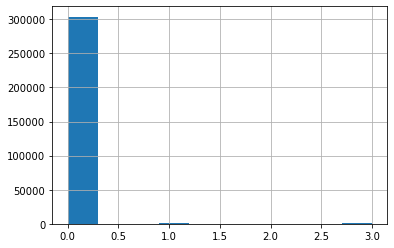

In [53]:
bureau_agg['DPD'].hist()

In [54]:
bureau_agg.to_csv(data_path + 'Processed/bureau_data.csv')

### Installments

In [55]:
installments = pd.read_csv(data_path + 'Raw/installments_payments.csv')

In [56]:
installments.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [57]:
installments['DAYS_SINCE_LAST_INSTALLMENT'] = -1*installments['DAYS_INSTALMENT']
installments['AMT_paid'] = installments['AMT_PAYMENT'] - installments['AMT_INSTALMENT']
installments.drop(columns = ['SK_ID_PREV','DAYS_INSTALMENT','DAYS_INSTALMENT', 'AMT_INSTALMENT', 'AMT_PAYMENT','NUM_INSTALMENT_VERSION', 'DAYS_ENTRY_PAYMENT'], inplace = True)

In [58]:
installments.head()

,SK_ID_CURR,NUM_INSTALMENT_NUMBER,DAYS_SINCE_LAST_INSTALLMENT,AMT_paid
0,161674,6,1180.0,0.000
1,151639,34,2156.0,0.000
2,193053,1,63.0,0.000
3,199697,3,2418.0,0.000
4,167756,2,1383.0,-4.455


In [59]:
agg = {'NUM_INSTALMENT_NUMBER' : 'max', 'DAYS_SINCE_LAST_INSTALLMENT' :'min', 'AMT_paid' : 'sum'}
installments_agg = installments.groupby('SK_ID_CURR').agg(agg)


In [60]:
installments_agg.reset_index(inplace = True)
installments_agg.columns = ['SK_ID_CURR', 'num_installments', 'last_payment_days', 'total_amt_paid']

In [61]:
installments_agg.to_csv(data_path + 'Processed/installments.csv')

### Credit Card Balance

In [62]:
credit_card_balance = pd.read_csv(data_path + 'Raw/credit_card_balance.csv')

In [63]:
credit_card_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,1800.0,0.000,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,2250.0,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.0,2250.0,26926.425,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,11925.0,11925.0,224949.285,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,27000.0,27000.0,443044.395,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [64]:
credit_card_balance_agg = credit_card_balance.groupby(['SK_ID_CURR', 'MONTHS_BALANCE']).agg({'AMT_BALANCE': 'max', 'AMT_CREDIT_LIMIT_ACTUAL':'sum', 'AMT_PAYMENT_CURRENT' :'sum', 'AMT_TOTAL_RECEIVABLE':'sum'})
credit_card_balance_agg.reset_index(inplace = True)

In [65]:
credit_card_balance_agg = credit_card_balance_agg.groupby('SK_ID_CURR').agg({'AMT_BALANCE': 'max', 'AMT_CREDIT_LIMIT_ACTUAL':'max', 'AMT_PAYMENT_CURRENT' :'max', 'AMT_TOTAL_RECEIVABLE':'max'}).reset_index()

In [66]:
credit_card_balance_agg.to_csv(data_path + 'Processed/installments.csv')

### POS_CASH_balance.csv


In [67]:
POS_CASH = pd.read_csv(data_path + 'Raw/POS_CASH_balance.csv')

In [68]:
POS_CASH.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [ ]:
POS_CASH_agg = POS_CASH.groupby(['SK_ID_CURR', 'MONTHS_BALANCE']).agg({'AMT_BALANCE': 'max', 'AMT_CREDIT_LIMIT_ACTUAL':'sum', 'AMT_PAYMENT_CURRENT' :'sum', 'AMT_TOTAL_RECEIVABLE':'sum'})
credit_card_balance_agg.reset_index(inplace = True)

### Previous Application

In [ ]:
previous_application = pd.read_csv(data_path + 'Raw/previous_application.csv')

In [ ]:
previous_application.head()

In [14]:
application_train[application_train.TARGET == 1].AMT_CREDIT.sum()

13846851949.5

In [22]:
application_train[application_train.TARGET == 0].AMT_CREDIT.sum()

170360232246.0

In [21]:
application_train[application_train.TARGET == 1].sum()

SK_ID_CURR                                                             6887675594
TARGET                                                                      24825
NAME_CONTRACT_TYPE              Cash loansCash loansCash loansCash loansCash l...
CODE_GENDER                     MFMFFMFMFFMFFFFMMMMMFMFMMMMMMMFFMMMFMMFMMFFFMF...
FLAG_OWN_CAR                    NNNNNYNNNNNNNNYYYNNYYNNNNNYYYNNYYYYNNYNNNNNNNN...
FLAG_OWN_REALTY                 YYYNYYYYYNYYYYYYNNYYYNYYYYYYNNYNNYNYYYNNYYYYYY...
CNT_CHILDREN                                                                11514
AMT_INCOME_TOTAL                                                      4.11131e+09
AMT_CREDIT                                                            1.38469e+10
AMT_ANNUITY                                                           6.57409e+08
AMT_GOODS_PRICE                                                       1.21285e+10
NAME_INCOME_TYPE                WorkingWorkingCommercial associateWorkingPensi...
NAME_EDUCATION_T

In [17]:
application_train[application_train.TARGET == 0].count()

SK_ID_CURR                      282686
TARGET                          282686
NAME_CONTRACT_TYPE              282686
CODE_GENDER                     282686
FLAG_OWN_CAR                    282686
FLAG_OWN_REALTY                 282686
CNT_CHILDREN                    282686
AMT_INCOME_TOTAL                282686
AMT_CREDIT                      282686
AMT_ANNUITY                     282674
AMT_GOODS_PRICE                 282429
NAME_TYPE_SUITE                 281464
NAME_INCOME_TYPE                282686
NAME_EDUCATION_TYPE             282686
NAME_FAMILY_STATUS              282686
NAME_HOUSING_TYPE               282686
REGION_POPULATION_RELATIVE      282686
DAYS_BIRTH                      282686
DAYS_EMPLOYED                   282686
DAYS_REGISTRATION               282686
DAYS_ID_PUBLISH                 282686
OWN_CAR_AGE                      97006
FLAG_MOBIL                      282686
FLAG_EMP_PHONE                  282686
FLAG_WORK_PHONE                 282686
FLAG_CONT_MOBILE         